In [59]:
import sqlite3
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = os.getcwd()

sql_folder = fr'{folder}\SQL'

files_folder = fr'{folder}\files'
if not os.path.exists(files_folder):
    os.mkdir(files_folder)

db = fr'{folder}\db\testDB.sqlite3'
conn = sqlite3.connect(db)


Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month_pay')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53982 entries, 0 to 53981
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   bID              53982 non-null  object        
 1   piID             53982 non-null  int64         
 2   Cost             53982 non-null  float64       
 3   BDate            53982 non-null  datetime64[ns]
 4   PayDate          50508 non-null  datetime64[ns]
 5   product          53982 non-null  object        
 6   piName           53982 non-null  object        
 7   month_pay        53982 non-null  int64         
 8   new_name         53982 non-null  object        
 9   tariff_name      53982 non-null  object        
 10  tariff_duration  53982 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(2), object(6)
memory usage: 4.5+ MB
None
                            

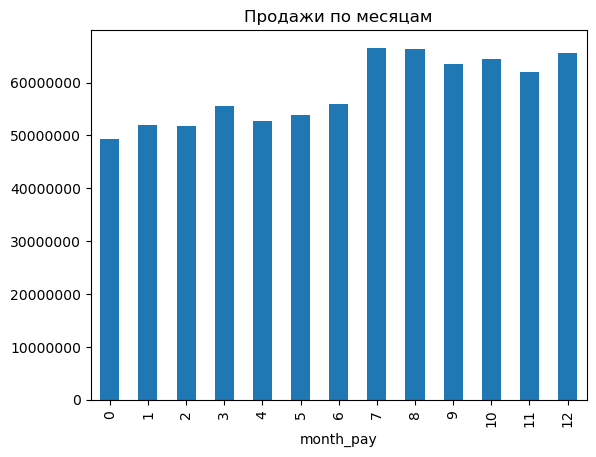

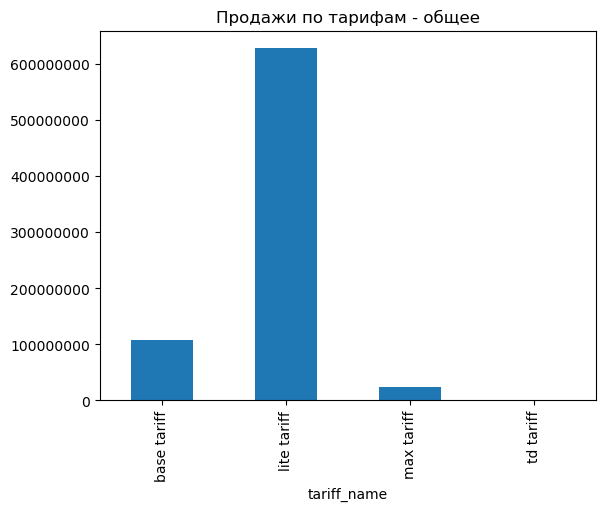

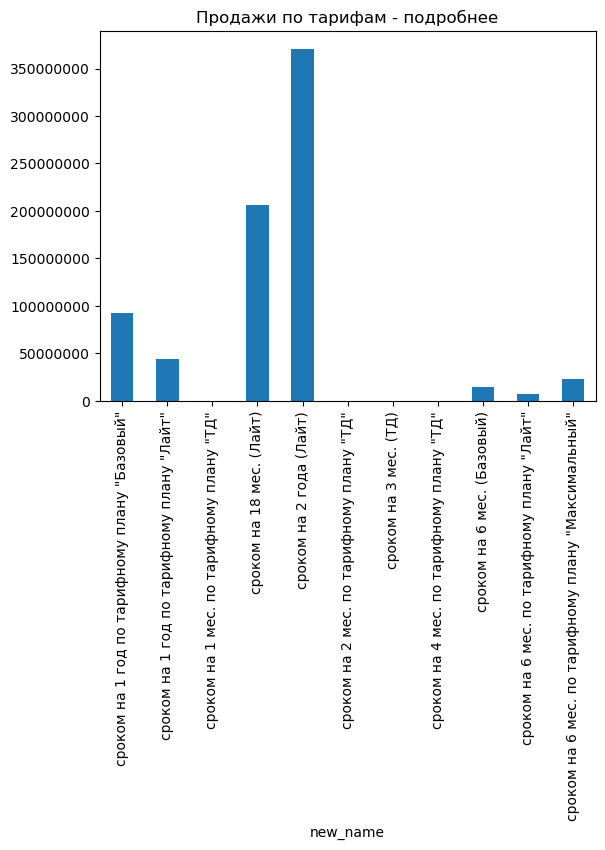

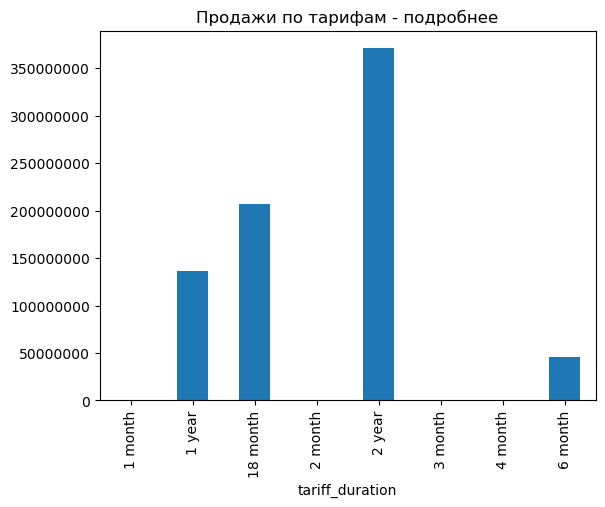

In [72]:
def clear_name(string):
    temp = string.split()
    return ' '.join(temp[4:])


def tariff_name(string):
    if 'Лайт' in string:
        return 'lite tariff'
    elif 'Базовый' in string:
        return 'base tariff'
    elif 'ТД' in string:
        return 'td tariff'
    elif 'Максимальный' in string:
        return 'max tariff'
    else:
        return 'unknown tariff'
    

def tariff_duration(string):
    if 'на 6 мес.' in string:
        return '6 month'
    elif 'на 1 год' in string:
        return '1 year'
    elif 'на 1 мес.' in string:
        return '1 month'
    elif 'на 18 мес.' in string:
        return '18 month'
    elif 'на 2 года' in string:
        return '2 year'
    elif 'на 2 мес.' in string:
        return '2 month'
    elif 'на 3 мес.' in string:
        return '3 month'
    elif 'на 4 мес.' in string:
        return '4 month'
    else:
        return 'unknown duration'


sql_sales = fr'{sql_folder}\sales.sql'
sales = open(sql_sales).read()

df_sales = pd.read_sql_query(sales, conn)
df_sales[['BDate', 'PayDate']] = df_sales[['BDate', 'PayDate']].apply(pd.to_datetime)
df_sales['month_pay'] = df_sales['PayDate'].dt.month
df_sales['month_pay'].fillna(0, inplace=True)
df_sales['month_pay'] = df_sales['month_pay'].astype('int64')
df_sales['new_name'] = df_sales['piName'].apply(clear_name)
df_sales['tariff_name'] = df_sales['new_name'].apply(tariff_name)
df_sales['tariff_duration'] = df_sales['new_name'].apply(tariff_duration)

# df_sales.to_csv(fr'{files_folder}\sales.csv', index=False, sep=';', encoding='utf-8')

df_pay_sum_by_month = df_sales[['Cost', 'month_pay']].groupby('month_pay')['Cost'].agg('sum')
df_pay_sum_by_name = df_sales[['Cost', 'new_name']].groupby('new_name')['Cost'].agg('sum')
df_pay_sum_by_tariff_name = df_sales[['Cost', 'tariff_name']].groupby('tariff_name')['Cost'].agg('sum')
df_pay_sum_by_tariff_duration = df_sales[['Cost', 'tariff_duration']].groupby('tariff_duration')['Cost'].agg('sum')

print(df_pay_sum_by_month.keys())
print(df_sales.info())
print(df_sales.head())
print('-' * 30)
print(df_pay_sum_by_month.head())
print('-' * 30)

# df_pay_sum_by_month.plot(kind = 'bar', y='Cost')
df_pay_sum_by_month.plot(kind = 'bar')
plt.title('Продажи по месяцам')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

df_pay_sum_by_tariff_name.plot(kind = 'bar')
plt.title('Продажи по тарифам - общее')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

df_pay_sum_by_name.plot(kind = 'bar')
plt.title('Продажи по тарифам - подробнее')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

df_pay_sum_by_tariff_duration.plot(kind = 'bar')
plt.title('Продажи по продолжительности тарифа')
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()
